This is a simple 2 layer MLP of the MNIST dataset classification, where sigmoid are used as activation functions of all layers.

All 42000 images belong to 10 classes.

# 1. Preprocessing Stage

- Before we put those images into the NN, we have to do some preprocessings to reduce overfitting and boost the accuracy.

- X_train = X_train/255.0 is used to normalize the train_data




# 2. FeedForward Propagation

Output of the neuron follows :

$\sum = wx + b$

$o = sigmoid(\sum)$

Suppose $w_1,b_1$ be the weights and biases of the 1st layer, and $w_2, b_2$ be the weights and biases of the 2nd layer, thus, the output of each neuron in the output layer would be :

$o_2 = sigmoid(w_2\sum + b_2)$

# 3. BackwardPropagation

This algorithm uses gradient descent method as optimization method.

Suppose $\delta_1$ and $\delta_2$ be the **error** of 1st and 2nd layer respectively, $\vec t_m = (t_1,t_2,....,t_m)$ and $\vec y_m = (y_1, y_2,....,y_m)$ be the target and output vector respectively, we have in the second layer :

$\delta = \frac{\partial E}{\partial w_ij} = y_i(y_i - t_i)(1-y_i)$


# 4. Activation Functions

1. ReLu
- Relu is the most popular activation function in machine learning, it is defined as :

$ReLu(x) = x$ for x>0

$ReLu(x) = 0$ for x<0

Relu is famous of it's simplifcity of it's derivative function, the derivative of ReLu is :

$ReLU'(x) = 0$ for x<0

$ReLU'(x) = 1$ for x>0

2. Softmax
- Softmax is another popular activation function, it can helps transform the output into probability, the softmax function is defined as :

$softmax(z)_i = \frac{e^{z_i}}{\sum_{j} e^{z_j}}$

3. Sigmoid

- Sigmoid is a type of activation function which has a S shape, in this program, the sigmoid function we used is :

$Sigmoid(x) = \frac{1}{1+e^{-x}}$


Epoch 1/700 Accuracy: 11.119047619047619%
Epoch 2/700 Accuracy: 9.68095238095238%
Epoch 3/700 Accuracy: 15.49047619047619%
Epoch 4/700 Accuracy: 17.738095238095237%
Epoch 5/700 Accuracy: 22.766666666666666%
Epoch 6/700 Accuracy: 46.96190476190476%
Epoch 7/700 Accuracy: 55.67857142857143%
Epoch 8/700 Accuracy: 51.247619047619054%
Epoch 9/700 Accuracy: 57.66904761904762%
Epoch 10/700 Accuracy: 48.38095238095238%
Epoch 11/700 Accuracy: 62.91190476190476%
Epoch 12/700 Accuracy: 60.083333333333336%
Epoch 13/700 Accuracy: 68.2047619047619%
Epoch 14/700 Accuracy: 57.173809523809524%
Epoch 15/700 Accuracy: 70.73809523809523%
Epoch 16/700 Accuracy: 67.39047619047619%
Epoch 17/700 Accuracy: 74.35714285714286%
Epoch 18/700 Accuracy: 69.57380952380953%
Epoch 19/700 Accuracy: 75.07619047619048%
Epoch 20/700 Accuracy: 74.41666666666666%
Epoch 21/700 Accuracy: 77.58571428571429%
Epoch 22/700 Accuracy: 76.28571428571429%
Epoch 23/700 Accuracy: 78.62857142857142%
Epoch 24/700 Accuracy: 78.2857142857142

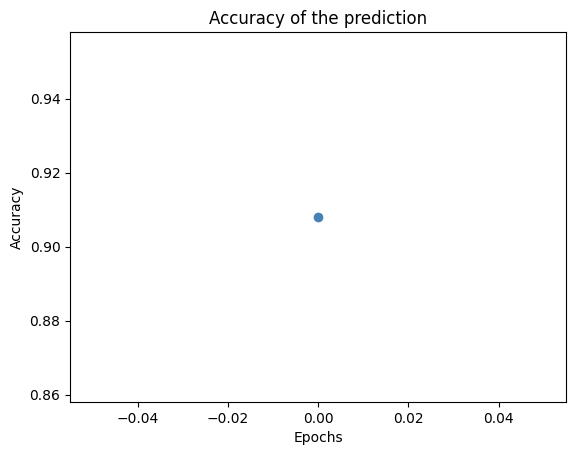

In [1]:
import numpy as np
import pandas as pd
import scipy as sci
import matplotlib.pyplot as plt
#Importing libaries 


path = "/kaggle/input/digit-recognizer/train.csv"
path1 = "/kaggle/input/digit-recognizer/test.csv"
data = pd.read_csv(path, engine='c')
test_data = pd.read_csv(path1, engine='c')
test_data = test_data/255.0
label_1 = data['label']
label_1 = label_1.T

data = np.array(data)
m,n = data.shape
train_data = data[0:m].T
X_train = train_data[1:n]
X_train = X_train/255.0


class Model(object):

    def __init__(self, input_dim=784, output_dim=10):
        self.num_neurons = 256
        self.batch_size = 256
        
        self.w_1 = np.random.randn(self.num_neurons, input_dim) * np.sqrt(2./input_dim)
        self.w_2 = np.random.randn(self.num_neurons, self.num_neurons) * np.sqrt(2./10)
        self.w_3 = np.random.randn(output_dim, self.num_neurons) * np.sqrt(2./10)
        
        self.b_1 = np.zeros((self.num_neurons, 1))
        self.b_2 = np.zeros((self.num_neurons, 1))
        self.b_3 = np.zeros((output_dim,1))
        
        self.learning_rate = 0.00001
        self.epochs = 700
        
#Kaiming initialization, useful in normalisation of parameters and to prevent model being overfitting.

    def sigmoid(self,x):
        return sci.special.expit(x)
    
    def sigmoid_derivative(self,x):
        return self.sigmoid(x)*(1-self.sigmoid(x))
    
    def ReLU(self, x):
        return np.maximum(0, x)

    def ReLU_derivative(self, x):
        return np.where(x > 0, 1.0, 0.0)

    def ELU(self, x):
        return np.where(x >= 0.0, x, self.alpha * (np.exp(x) - 1))

    def ELU_deriv(self,x):
        return np.where(x >= 0, 1, self.alpha * np.exp(x))

    def softmax(self, z):
        e_z = np.exp(z-np.max(z))
        return sci.special.softmax(e_z)
    
    def softmax_backward(self,z):
        do_dz = self.softmax(1-self.softmax)
        
    
#Defining a set of activation functions for the convenience of changing act. functions below


    def Forward(self, X_train):
        self.sum_1 = np.dot(self.w_1, X_train) + self.b_1
        self.output_1 = self.sigmoid(self.sum_1)
        #First layer, using Sigmoid as activation

        self.sum_2 = np.dot(self.w_2, self.output_1) + self.b_2
        self.output_2 = self.sigmoid(self.sum_2)
        #Second Layer, using Sigmoid as activation
        
        self.sum_3 = np.dot(self.w_3, self.output_2)+self.b_3
        self.output_3 = self.sigmoid(self.sum_3)

        self.predictions = np.argmax(self.output_3, axis=0)
        return self.predictions
    
    #FeedForward Propagation, used to predict the label of the data.
    
    
    def Backward(self, label_1, X_train):
        
        one_hot_labels = np.eye(10)[label_1].T
        self.error = self.output_3 - one_hot_labels
        self.delta_3 = self.error*self.sigmoid_derivative(self.output_3)
        self.d_w_3 = np.dot(self.delta_3, self.output_2.T)  # Change output_3 to output_2
        self.d_b_3 = np.sum(self.delta_3, axis=1, keepdims=True)
    
        self.delta_2 = np.dot(self.w_3.T, self.delta_3)*self.sigmoid_derivative(self.output_2)  # Change w_2 to w_3
        self.d_w_2 = np.dot(self.delta_2, self.output_1.T)  # Change output_2 to output_1
        self.d_b_2 = np.sum(self.delta_2, axis=1, keepdims=True)
    
        self.delta_1 = np.dot(self.w_2.T, self.delta_2) * self.sigmoid_derivative(self.output_1)  # Change w_1 to w_2
        self.d_w_1 = np.dot(self.delta_1, X_train.T)
        self.d_b_1 = np.sum(self.delta_1, axis=1, keepdims=True)
        
#Backwardpropagation, this program used gradient descent method to optimize the model
        

    def update_params(self):
        self.w_1 -= self.learning_rate * self.d_w_1
        self.w_2 -= self.learning_rate * self.d_w_2
        self.w_3 -= self.learning_rate * self.d_w_3
        
        self.b_1 -= self.learning_rate * self.d_b_1
        self.b_2 -= self.learning_rate * self.d_b_2
        self.b_3 -= self.learning_rate * self.d_b_3
        
#Updating parameters

    def compute_accuracy(self, label_1):
        correct_predictions = np.sum(self.predictions == label_1)
        total_predictions = self.predictions.shape[0]
        self.accuracy = correct_predictions / total_predictions
        

    def fit(self, X_train, label_1):
        
        for epoch in range(self.epochs):
            list_1 = list()
            self.Forward(X_train)
            self.Backward(label_1, X_train)
            self.update_params()
            self.compute_accuracy(label_1)
            list_1.append(self.accuracy)
            print(f"Epoch {epoch + 1}/{self.epochs} Accuracy: {self.accuracy * 100}%")
        
        for i in range(len(list_1)):
            plt.scatter(i,list_1[i], color='steelblue',linestyle='solid')
            
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.title("Accuracy of the prediction")
        plt.show()
        #Create loop for training the model

        
    def test(self,test_data):
        output = []
        num_batch = len(test_data)
        chunks = list()
        chunk_size = 256
        num_chunks = len(test_data)//chunk_size+1
        for t in range(num_chunks):
            chunks.append(test_data[t*chunk_size:(t+1)*chunk_size])
# Create an instance of the Model class
model = Model()

# Train the model
model.fit(X_train, label_1)
